In [14]:
# Run some setup code for this notebook.

import random
import numpy as np
from asgn1.cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import DataUtils as du
X_train, y_train, P_train, X_val, y_val, P_val, X_test, y_test, P_test = du.loadData()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (18927, 32, 32, 3)
Train labels shape:  (18927,)
Validation data shape:  (5375, 32, 32, 3)
Validation labels shape:  (5375,)
Test data shape:  (2682, 32, 32, 3)
Test labels shape:  (2682,)


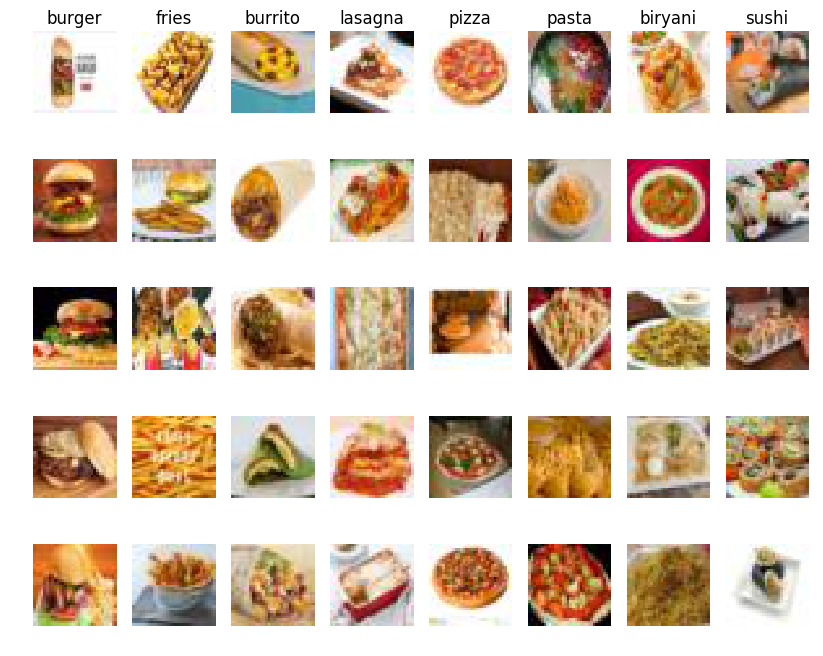

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['burger', 'fries', 'burrito', 'lasagna', 'pizza', 'pasta', 'biryani', 'sushi']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

#plt.savefig('assets/data_vis_2.png')
plt.show()

In [4]:
from asgn1.cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 18927 images
Done extracting features for 2000 / 18927 images
Done extracting features for 3000 / 18927 images
Done extracting features for 4000 / 18927 images
Done extracting features for 5000 / 18927 images
Done extracting features for 6000 / 18927 images
Done extracting features for 7000 / 18927 images
Done extracting features for 8000 / 18927 images
Done extracting features for 9000 / 18927 images
Done extracting features for 10000 / 18927 images
Done extracting features for 11000 / 18927 images
Done extracting features for 12000 / 18927 images
Done extracting features for 13000 / 18927 images
Done extracting features for 14000 / 18927 images
Done extracting features for 15000 / 18927 images
Done extracting features for 16000 / 18927 images
Done extracting features for 17000 / 18927 images
Done extracting features for 18000 / 18927 images


In [5]:
X_train_feats.shape

(18927, 155)

In [6]:
#Use the validation set to tune the learning rate and regularization strength

from asgn1.cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-4, 1e-3, 1e-2]
regularization_strengths = [1e0, 1e1]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for _l in learning_rates:
    for _r in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=_l, reg=_r,
                      num_iters=1500, verbose=False)
                
        y_train_pred = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        #print('training accuracy: {0}'.format(train_accuracy))
        
        y_val_pred = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_val_pred)
        #print('validation accuracy: {0}'.format(val_accuracy))

        results[(_l, _r)] = (train_accuracy, val_accuracy)
        if (val_accuracy > best_val):
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-04 reg 1.000000e+00 train accuracy: 0.208802 val accuracy: 0.195907
lr 1.000000e-04 reg 1.000000e+01 train accuracy: 0.192107 val accuracy: 0.186977
lr 1.000000e-03 reg 1.000000e+00 train accuracy: 0.234955 val accuracy: 0.214140
lr 1.000000e-03 reg 1.000000e+01 train accuracy: 0.196492 val accuracy: 0.185302
lr 1.000000e-02 reg 1.000000e+00 train accuracy: 0.216939 val accuracy: 0.196837
lr 1.000000e-02 reg 1.000000e+01 train accuracy: 0.170127 val accuracy: 0.161488
best validation accuracy achieved during cross-validation: 0.214140


In [7]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.222222222222


In [16]:
plt.plot(best_svm['train_acc_history'], '-o', label='train')
plt.plot(best_svm['val_acc_history'], '-o', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.savefig('assets/imagefeatures_svm_classificationaccuracy.png')
plt.show()

TypeError: 'LinearSVM' object is not subscriptable

113
23
88
154
180
86
95
178


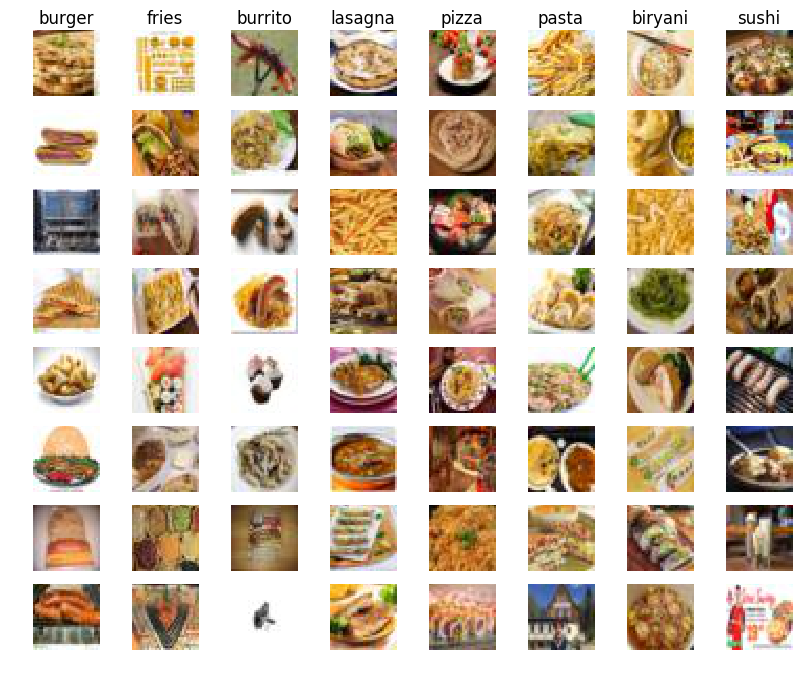

In [8]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['burger', 'fries', 'burrito', 'lasagna', 'pizza', 'pasta', 'biryani', 'sushi']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    print(len(idxs))
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)

plt.savefig('assets/mistakes_deepdish_features.png')
plt.show()

48
5
14
48
51
19
27
38


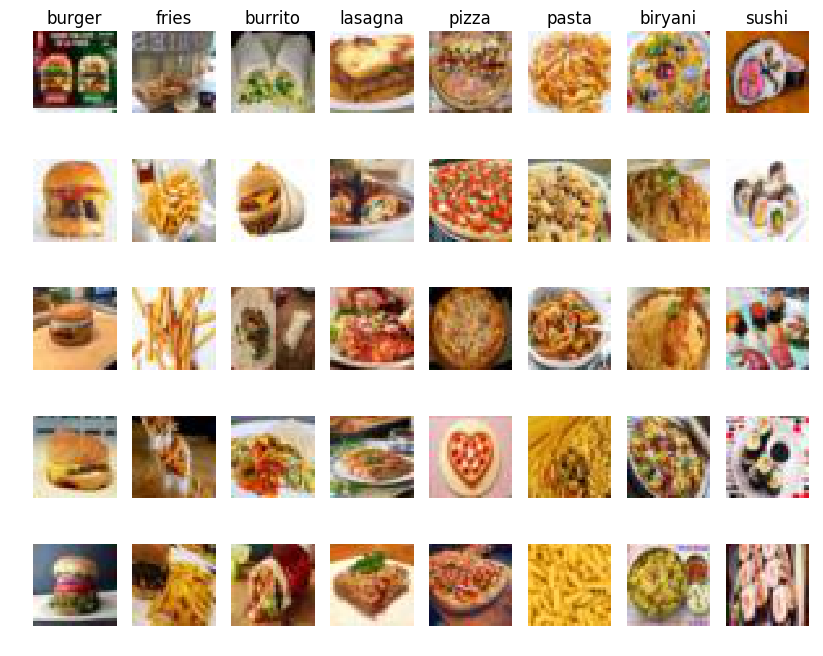

In [9]:
# correct

examples_per_class = 5
classes = ['burger', 'fries', 'burrito', 'lasagna', 'pizza', 'pasta', 'biryani', 'sushi']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test == cls) & (y_test_pred == cls))[0]
    print(len(idxs))
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)

plt.savefig('assets/correct_deepdish_features.png')
plt.show()

In [10]:
from asgn1.cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 20

best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

learning_rates = [1, 0.9]
regularization_strengths = [0]
learning_rate_decay = [1, 0.95, 0.8]
hidden_dim = [500, 750, 1000]

for _l in learning_rates:
  for _r in regularization_strengths:
    for _d in learning_rate_decay:
      for _h in hidden_dim:
        net = TwoLayerNet(input_dim, _h, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=_l, learning_rate_decay=_d,
            reg=_r, verbose=False)

        # Predict on the validation set
        val_accuracy = (net.predict(X_val_feats) == y_val).mean()
        print('Validation accuracy: {0}. learning rate : {1}. regularization strength : {2}. decay : {3} '.format(val_accuracy, _l, _r, _d))
        
        if (val_accuracy > best_val):
            best_val = val_accuracy
            best_net = net
            best_stats = stats

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
Validation accuracy: 0.23925581395348838. learning rate : 1. regularization strength : 0. decay : 1 
num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
Validation accuracy: 0.2483720930232558. learning rate : 1. regularization strength : 0. decay : 1 
num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
Validation accuracy: 0.23348837209302326. learning rate : 1. regularization strength : 0. decay : 1 
num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
Validation accuracy: 0.25227906976744185. learning rate : 1. regularization strength : 0. decay : 0.95 
num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
Validation accuracy: 0.24353488372093024. learning rate : 1. regularization strength : 0. decay : 0.95 
num_train : 18927
batch_size : 200
iterations_per_epoch : 94
num_iters : 1000
Validation accuracy: 0

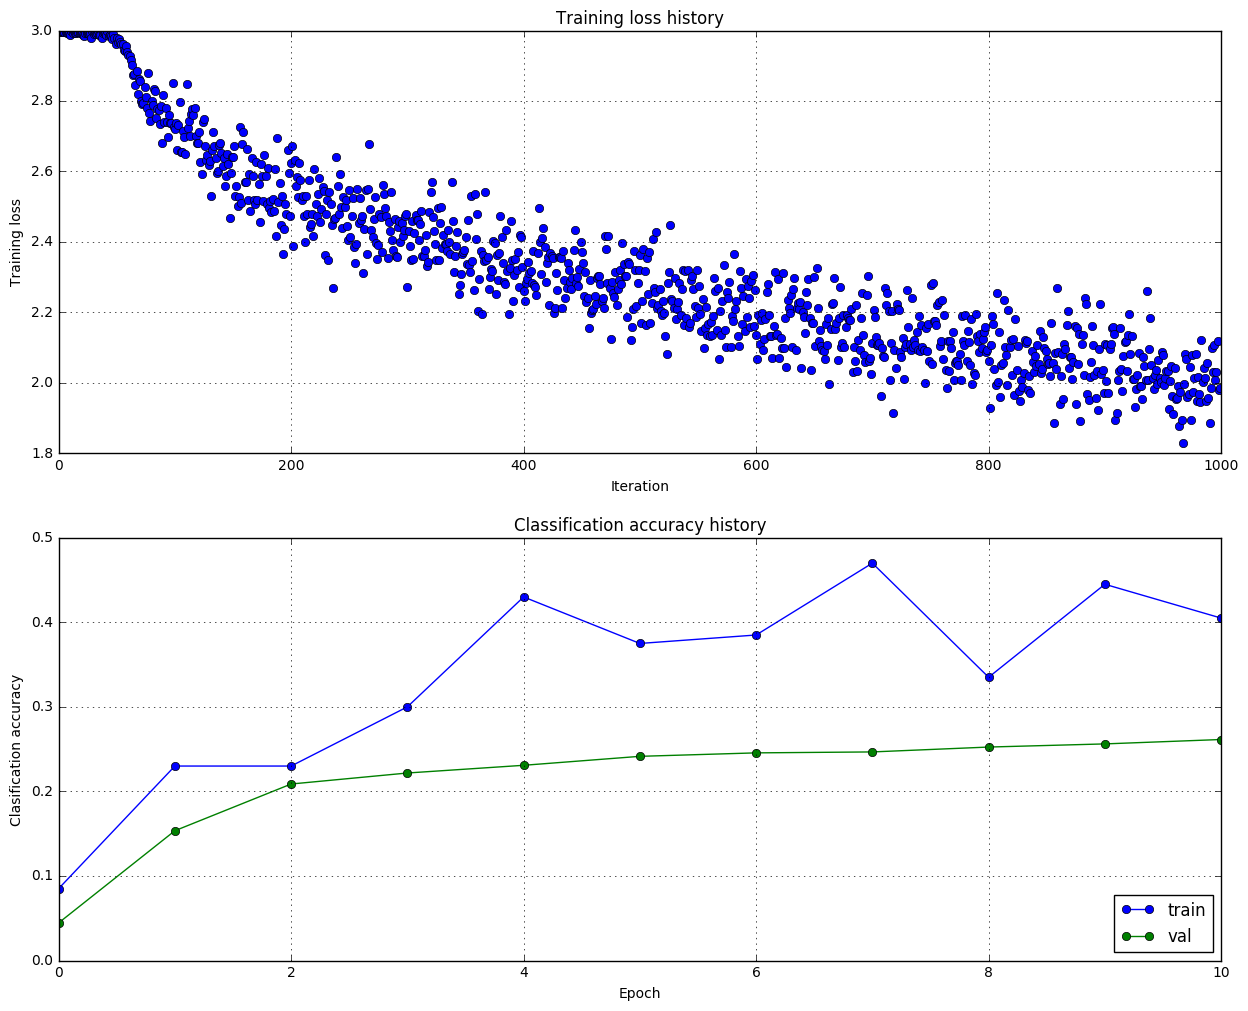

In [11]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'], 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], '-o', label='train')
plt.plot(best_stats['val_acc_history'], '-o', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)

#plt.savefig('assets/3_using_feature.png')
plt.show()

In [12]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.267337807606


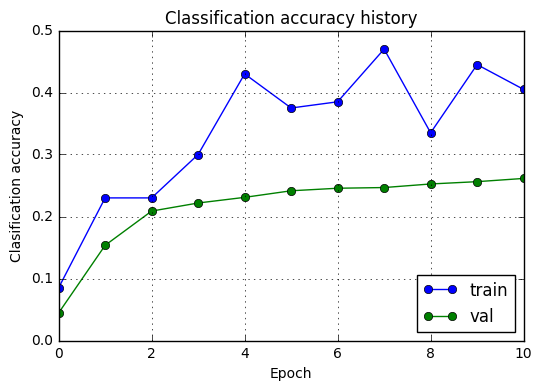

In [15]:
plt.plot(best_stats['train_acc_history'], '-o', label='train')
plt.plot(best_stats['val_acc_history'], '-o', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.savefig('assets/imagefeatures_fctwolayer_classificationaccuracy.png')
plt.show()